In [1]:
%matplotlib notebook
#%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
from collections import Counter
from src.utils.load_data import (load_iris, load_wine, 
                                load_diabetes, load_glass,
                                load_pima_diabetes)
import seaborn as sbn
from matplotlib import pyplot as plt

# Iris Insight:

In [31]:
iris = load_iris()
print(iris.columns)

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class',
       'ClassIndex'],
      dtype='object')


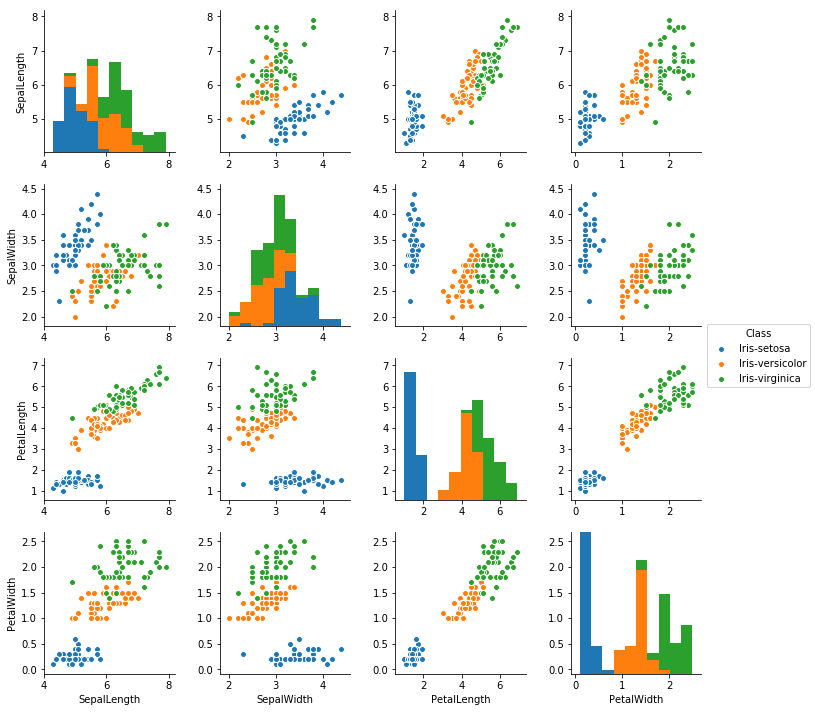

In [30]:
sbn.pairplot(iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']], hue='Class')

## Iris Stats:

In [55]:
iris_stats = iris.describe()
iris_stats = iris_stats.append(iris.nunique().rename('nunique').astype(int))
iris_stats

,SepalLength,SepalWidth,PetalLength,PetalWidth,ClassIndex,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000,NaN
mean,5.843333,3.054000,3.758667,1.198667,1.000000,NaN
std,0.828066,0.433594,1.764420,0.763161,0.819232,NaN
min,4.300000,2.000000,1.000000,0.100000,0.000000,NaN
25%,5.100000,2.800000,1.600000,0.300000,0.000000,NaN
50%,5.800000,3.000000,4.350000,1.300000,1.000000,NaN
75%,6.400000,3.300000,5.100000,1.800000,2.000000,NaN
max,7.900000,4.400000,6.900000,2.500000,2.000000,NaN
nunique,35.000000,23.000000,43.000000,22.000000,3.000000,3.0


## Nb Unique Values

In [91]:
sum(iris_stats.loc['nunique'])

129.0

## Attributes Histograms & Distributions

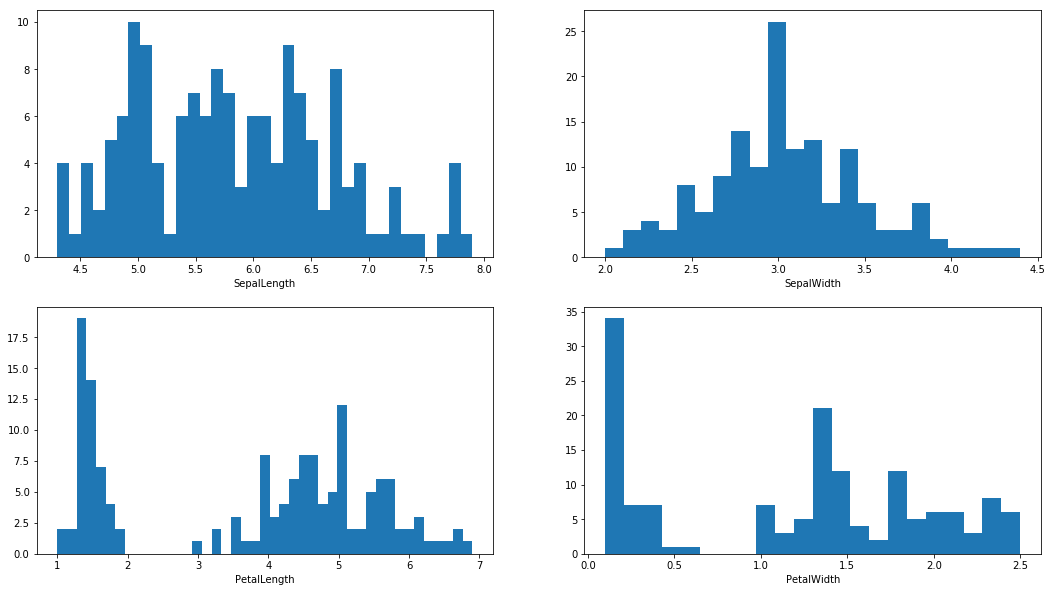

In [81]:
fig, ax = plt.subplots(2,2, figsize=(18, 10))
col = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
ax[0][0].hist(iris[col[0]], bins = int(iris_stats[col[0]]['nunique']))
ax[0][0].set_xlabel(col[0])
ax[0][1].hist(iris[col[1]], bins = int(iris_stats[col[1]]['nunique']))
ax[0][1].set_xlabel(col[1])

ax[1][0].hist(iris[col[2]], bins = int(iris_stats[col[2]]['nunique']))
ax[1][0].set_xlabel(col[2])
ax[1][1].hist(iris[col[3]], bins = int(iris_stats[col[3]]['nunique']))
ax[1][1].set_xlabel(col[3])
plt.show()

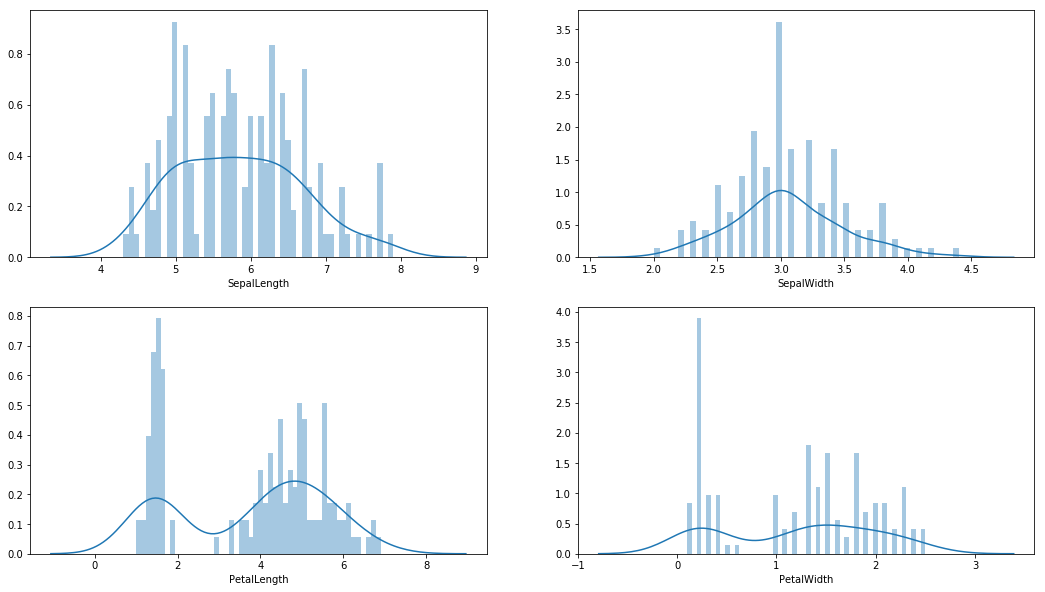

In [83]:
fig, ax = plt.subplots(2,2, figsize=(18, 10))
sbn.distplot(iris['SepalLength'], bins = 50, ax=ax[0][0])
sbn.distplot(iris['SepalWidth'], bins=50, ax=ax[0][1])

sbn.distplot(iris['PetalLength'], bins = 50, ax=ax[1][0])
sbn.distplot(iris['PetalWidth'], bins=50, ax=ax[1][1])
plt.show()

# Wine Insight:

In [4]:
wine = load_wine()
wine.head(10)

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315 of diluted wines,Proline,ClassIndex
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,0
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0


## Pair Plots

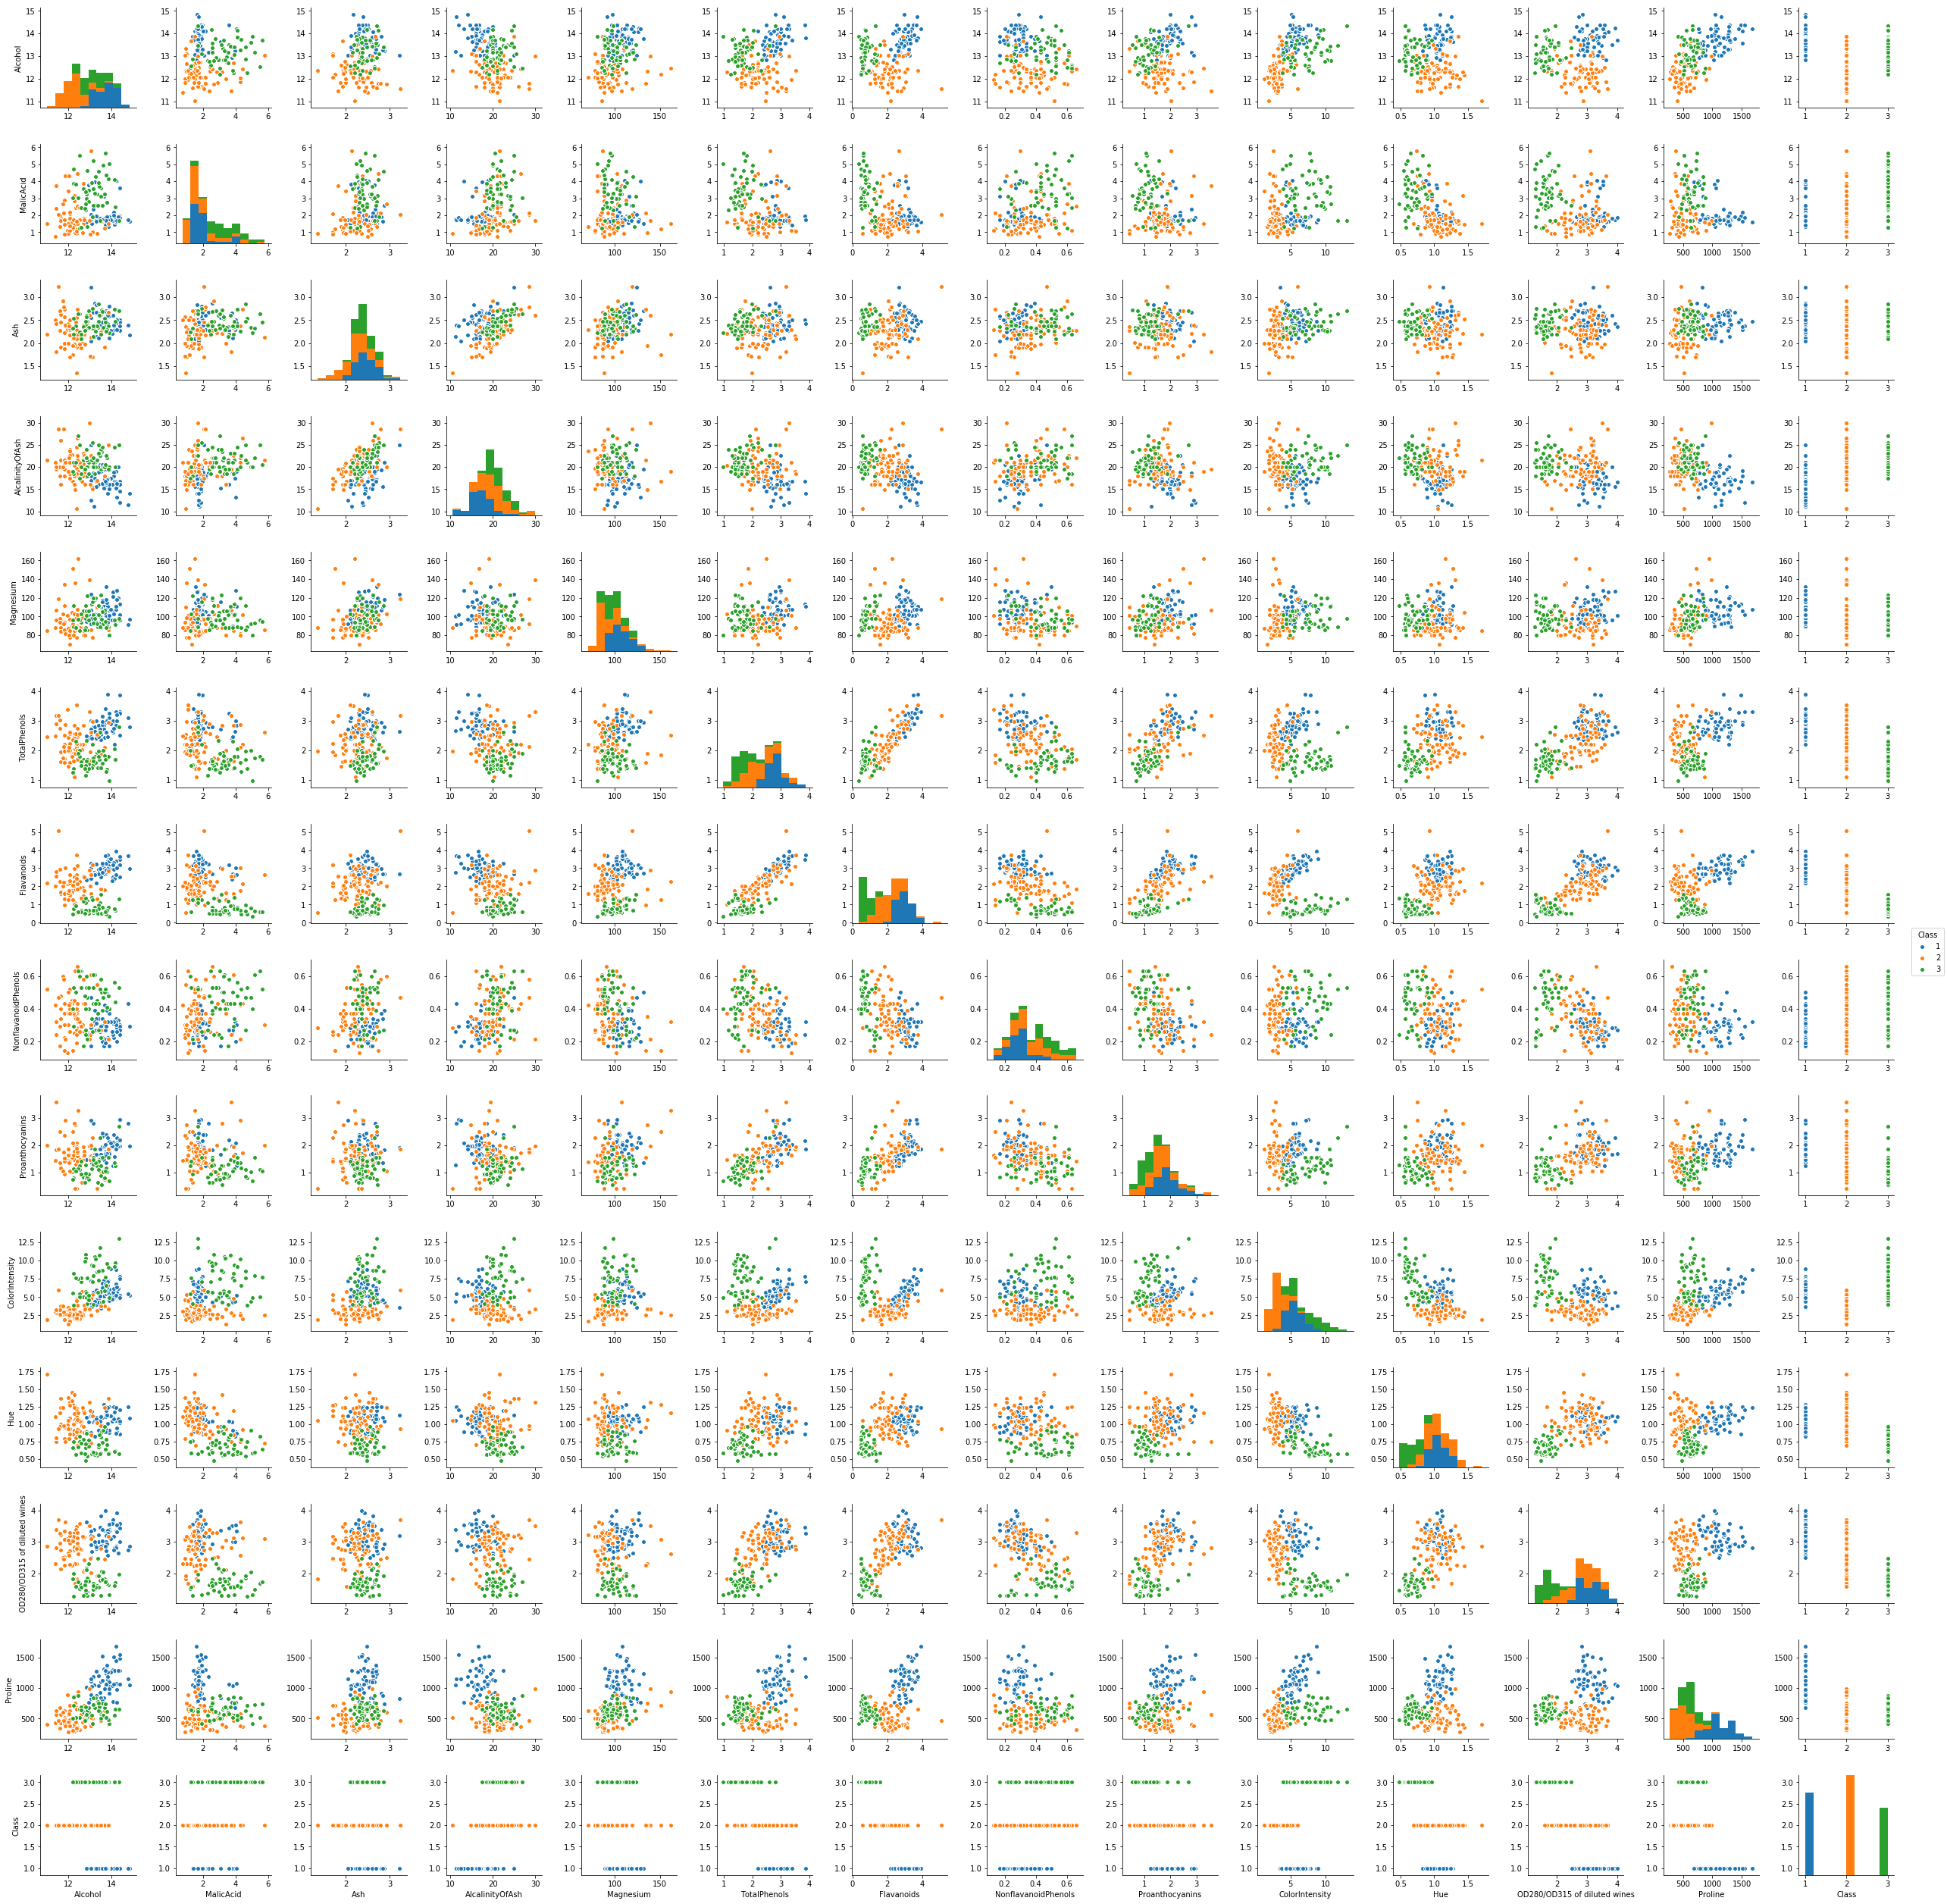

In [86]:
sbn.pairplot(wine[['Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium',
                   'TotalPhenols', 'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins',
                   'ColorIntensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline', 'Class']], hue='Class')

## Wine Stats:

In [87]:
wine_stats = wine.describe()
wine_stats = wine_stats.append(wine.nunique().rename('nunique').astype(int))
wine_stats

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315 of diluted wines,Proline,ClassIndex
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000
nunique,3.000000,126.000000,133.000000,79.000000,63.000000,53.000000,97.000000,132.000000,39.000000,101.000000,132.000000,78.000000,122.000000,121.000000,3.000000


## Nb Unique Values

In [90]:
sum(wine_stats.loc['nunique'])

1282.0

In [11]:
for v in set(wine.Class):
    print(v, len(wine[wine.Class==v]))

1 59
2 71
3 48


## Attributes Histograms

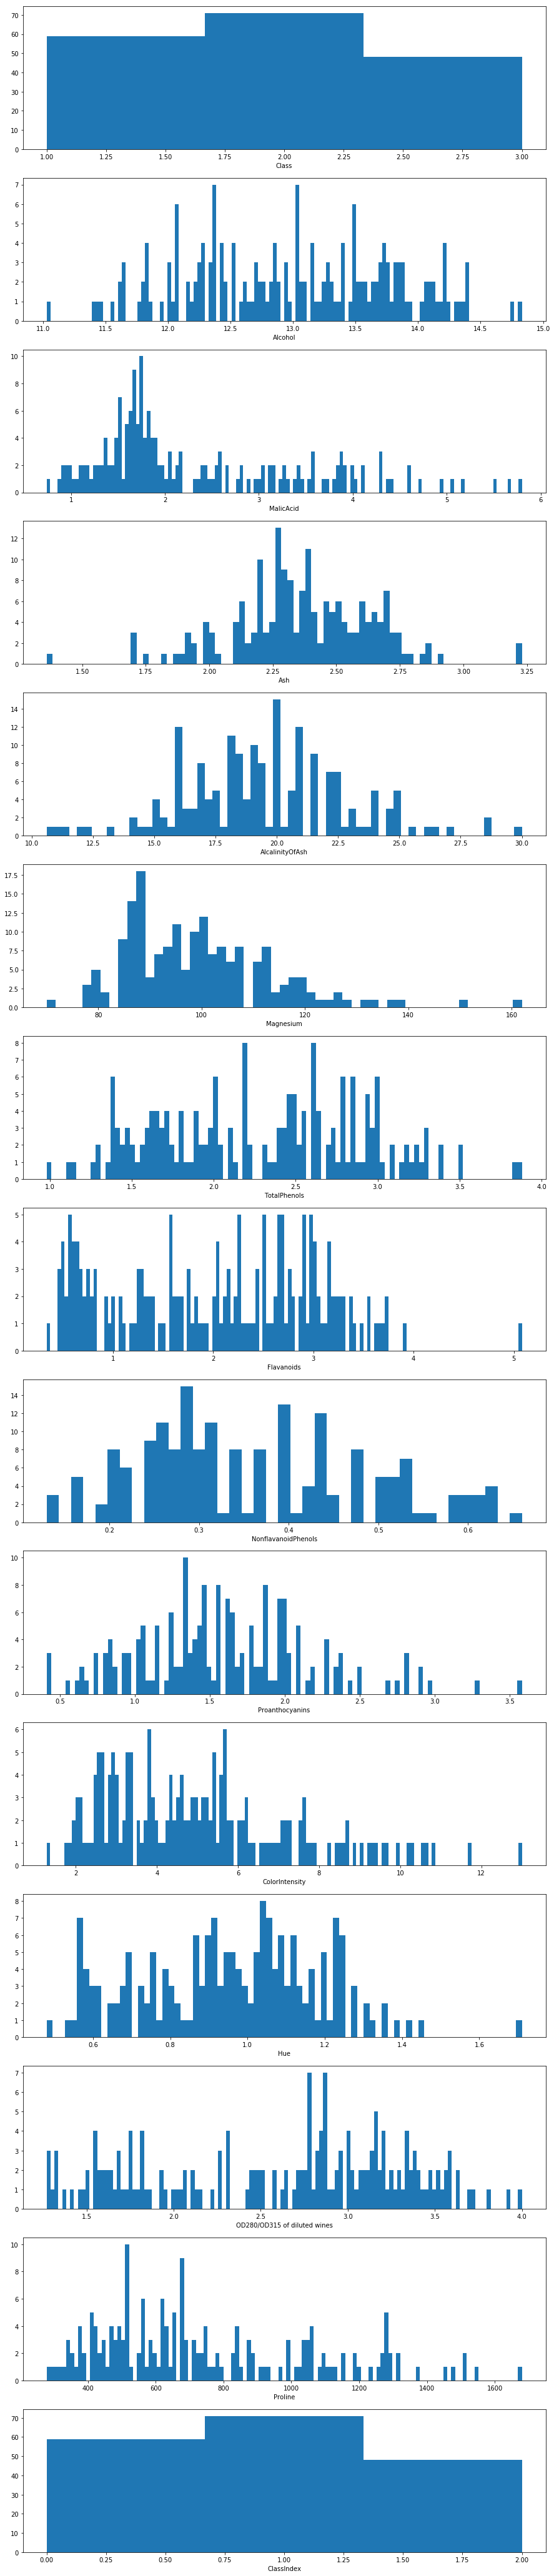

In [99]:
col = wine.columns
fig, ax = plt.subplots(len(col), 1, figsize=(15, len(col)*5))

for i in range(len(col)):
    ax[i].hist(wine[col[i]], bins = int(wine_stats[col[i]]['nunique']))
    ax[i].set_xlabel(col[i])
plt.show()

## Attributes Distributions

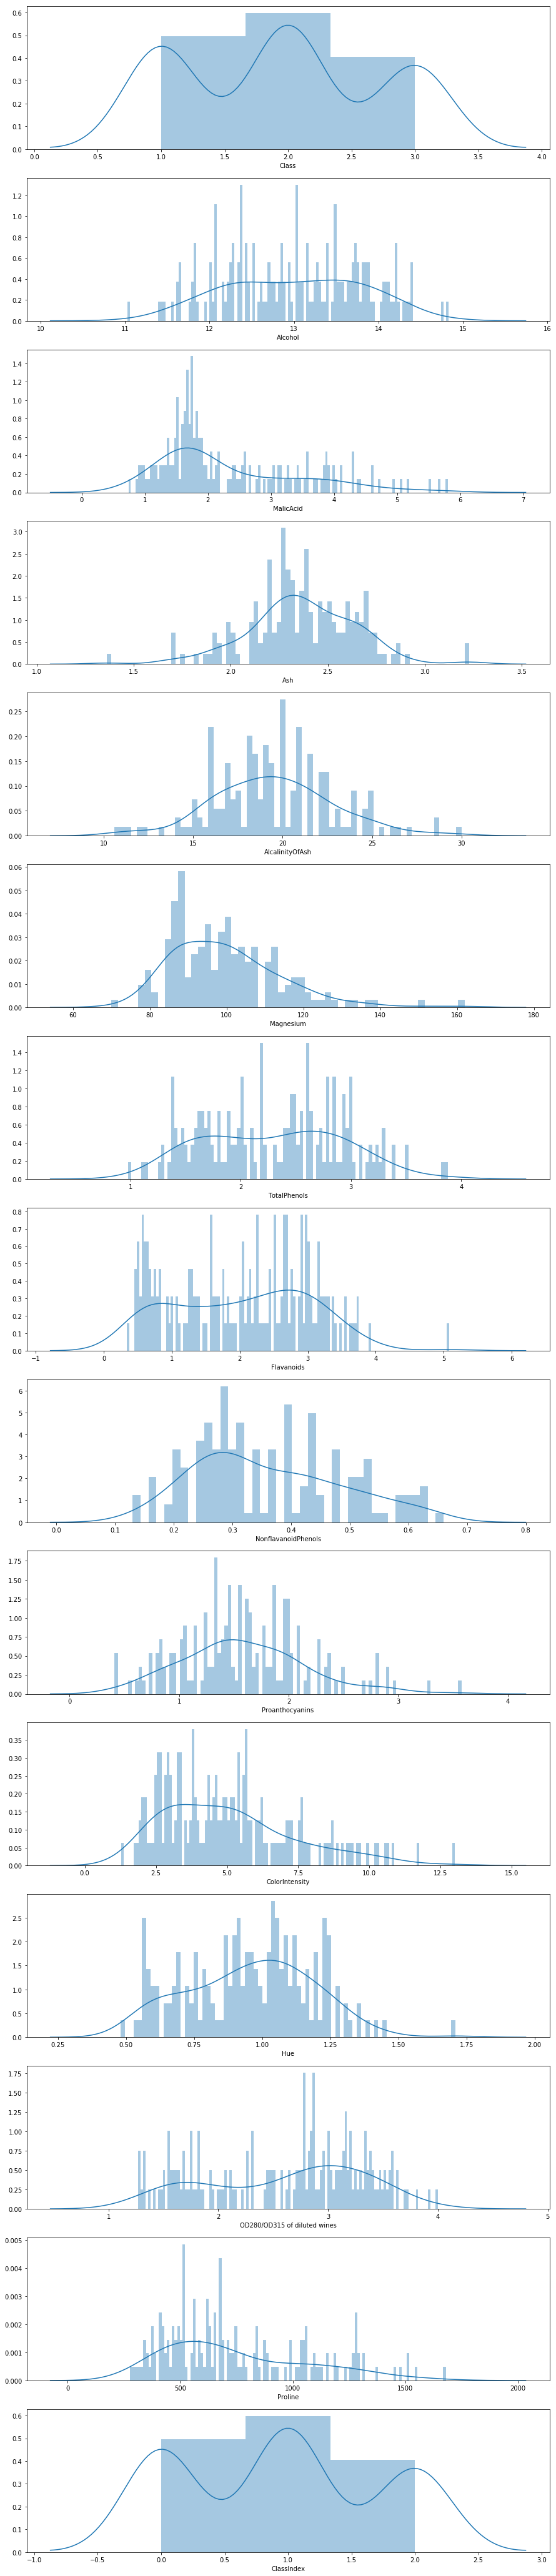

In [97]:
col = wine.columns
fig, ax = plt.subplots(len(col), 1, figsize=(15, len(col)*5))

for i in range(len(col)):
    sbn.distplot(wine[col[i]], bins = int(wine_stats[col[i]]['nunique']), ax=ax[i])
plt.show()

# Glass Insight:

In [8]:
glass = load_glass()
print(glass.columns)
glass.head()

Index(['RefractiveIndex', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon',
       'Potassium', 'Calcium', 'Barium', 'Iron', 'Class', 'ClassIndex'],
      dtype='object')


,RefractiveIndex,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Class,ClassIndex
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


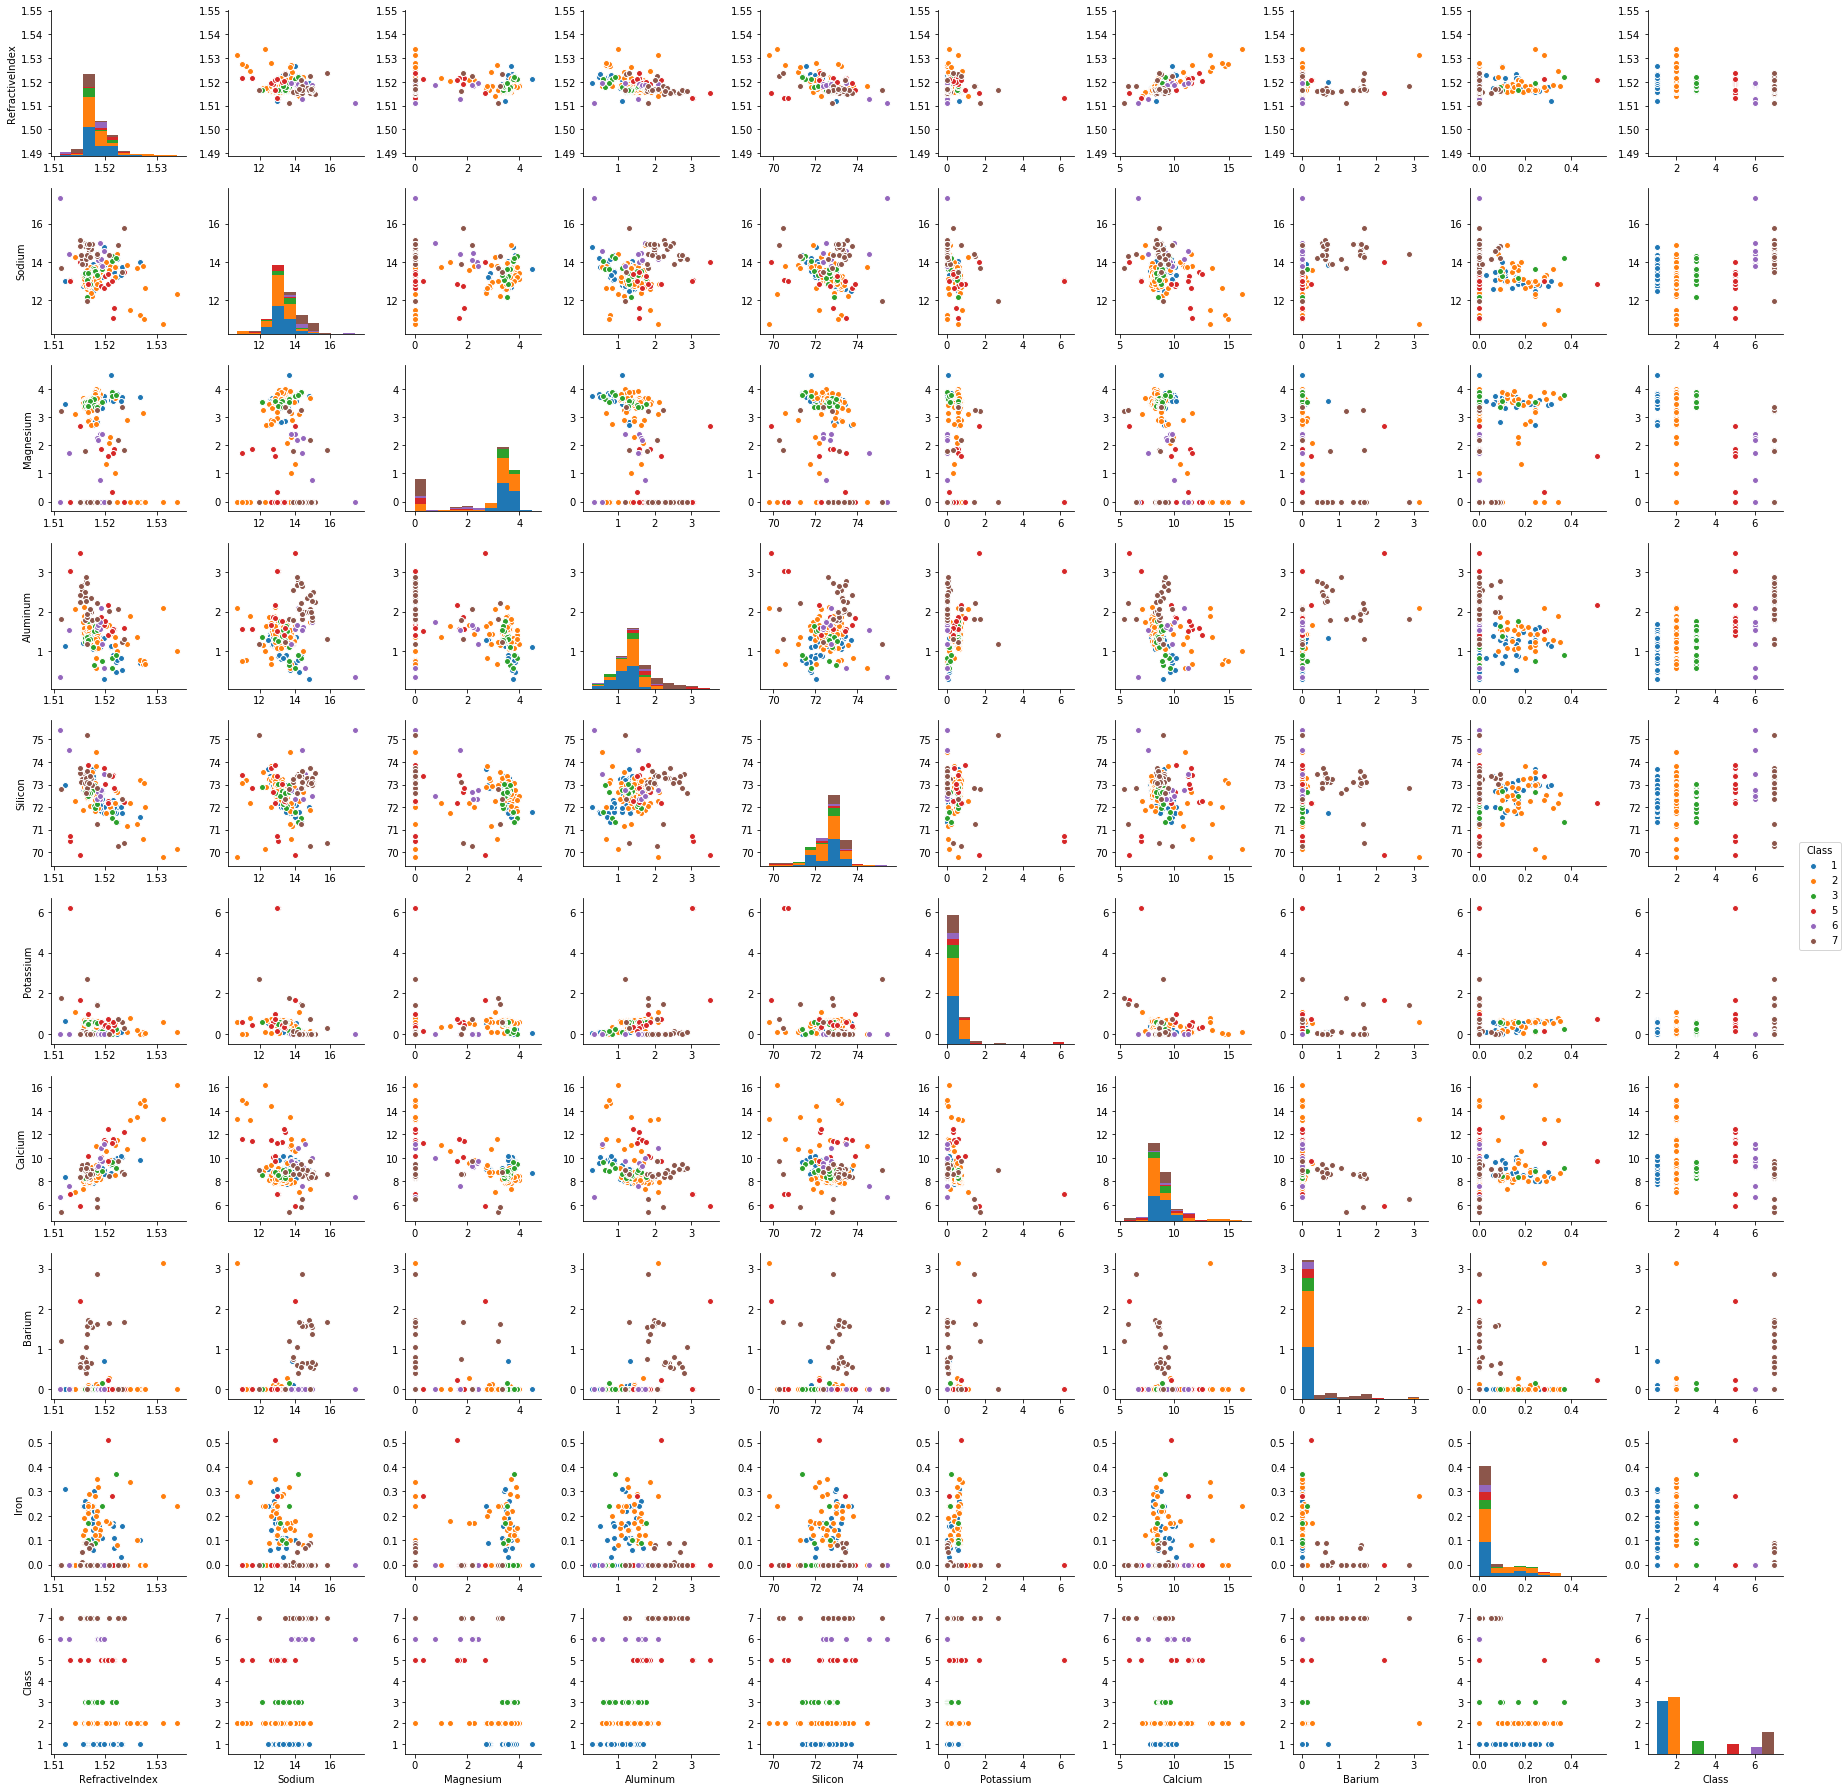

In [111]:
sbn.pairplot(glass[['RefractiveIndex', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon',
                    'Potassium', 'Calcium', 'Barium', 'Iron', 'Class']], hue='Class')

## Glass Stats:

In [112]:
glass_stats = glass.describe()
glass_stats = glass_stats.append(glass.nunique().rename('nunique').astype(int))
glass_stats

,RefractiveIndex,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Class,ClassIndex
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374,1.542056
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739,1.707648
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000,1.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000,2.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000,5.000000
nunique,178.000000,142.000000,94.000000,118.000000,133.000000,65.000000,143.000000,34.000000,32.000000,6.000000,6.000000


## Nb Unique Values

In [113]:
sum(glass_stats.loc['nunique'])

951.0

In [10]:
for v in set(glass.Class):
    print(v, len(glass[glass.Class==v]))

1 70
2 76
3 17
5 13
6 9
7 29


## Attributes Histograms

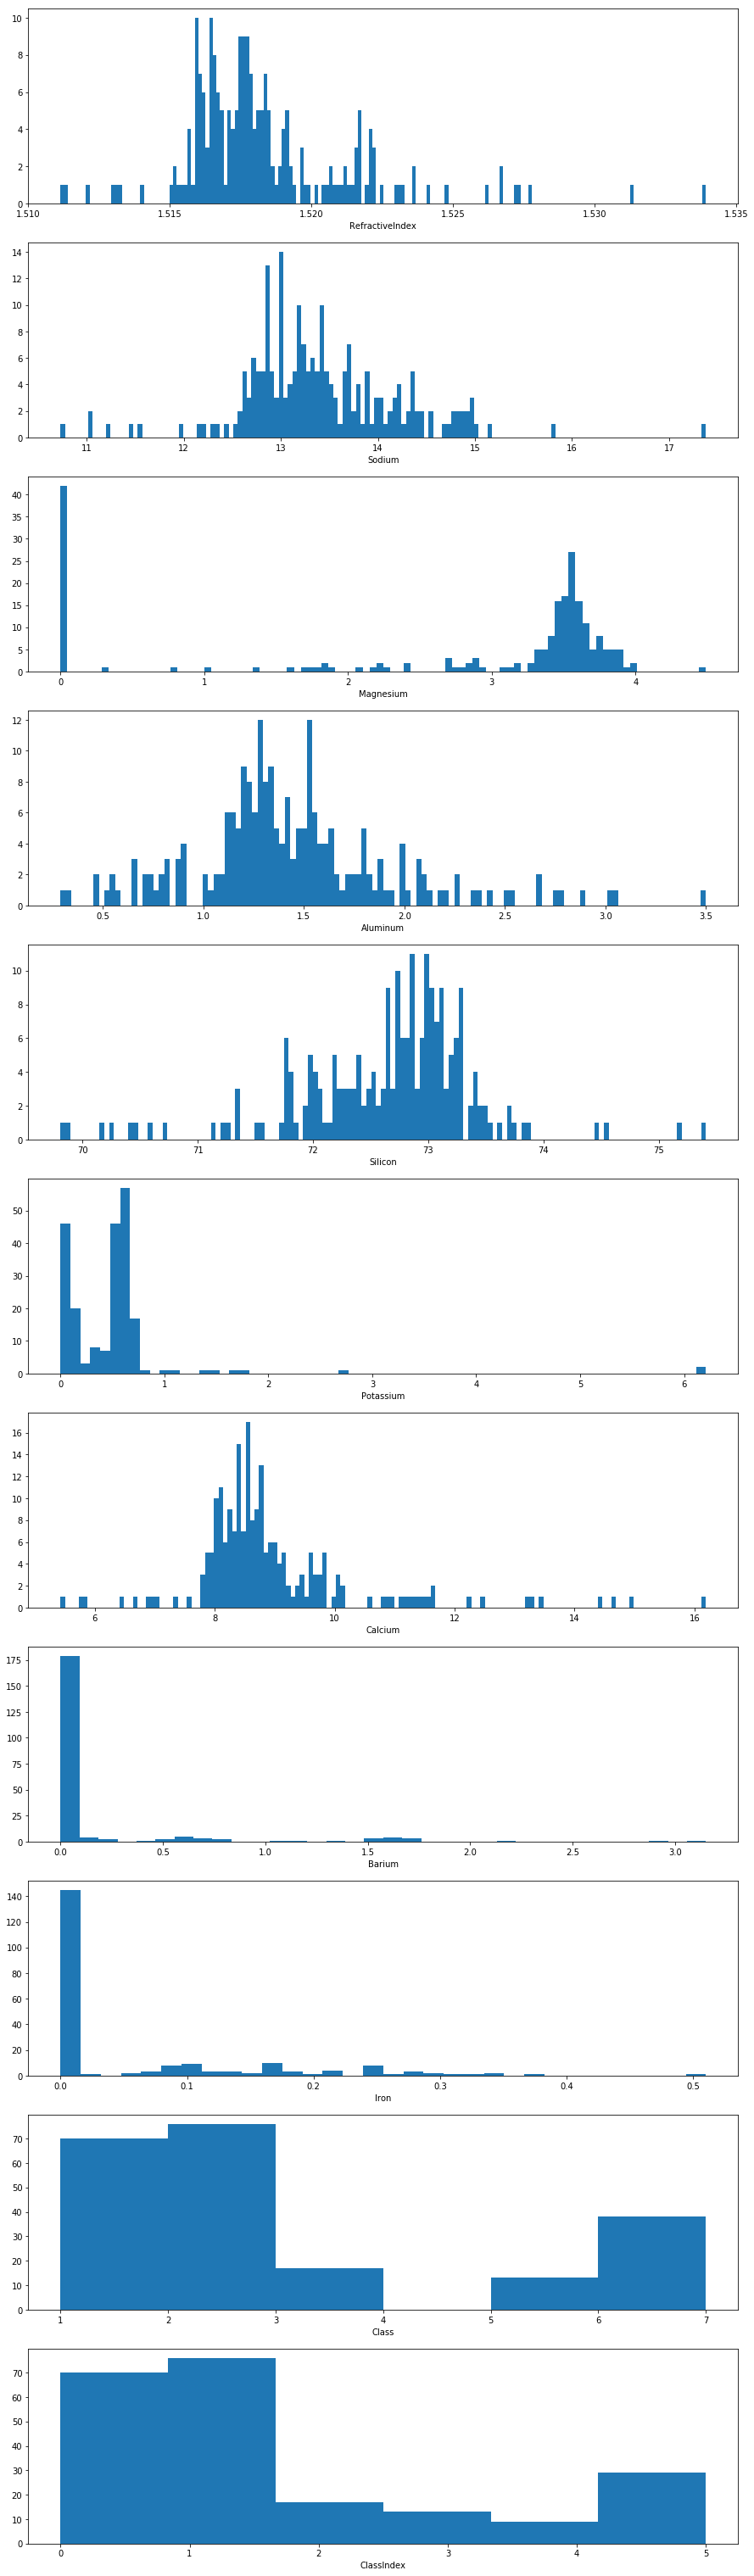

In [114]:
col = glass.columns
fig, ax = plt.subplots(len(col), 1, figsize=(15, len(col)*5))

for i in range(len(col)):
    ax[i].hist(glass[col[i]], bins = int(glass_stats[col[i]]['nunique']))
    ax[i].set_xlabel(col[i])
plt.show()

## Attributes Distributions

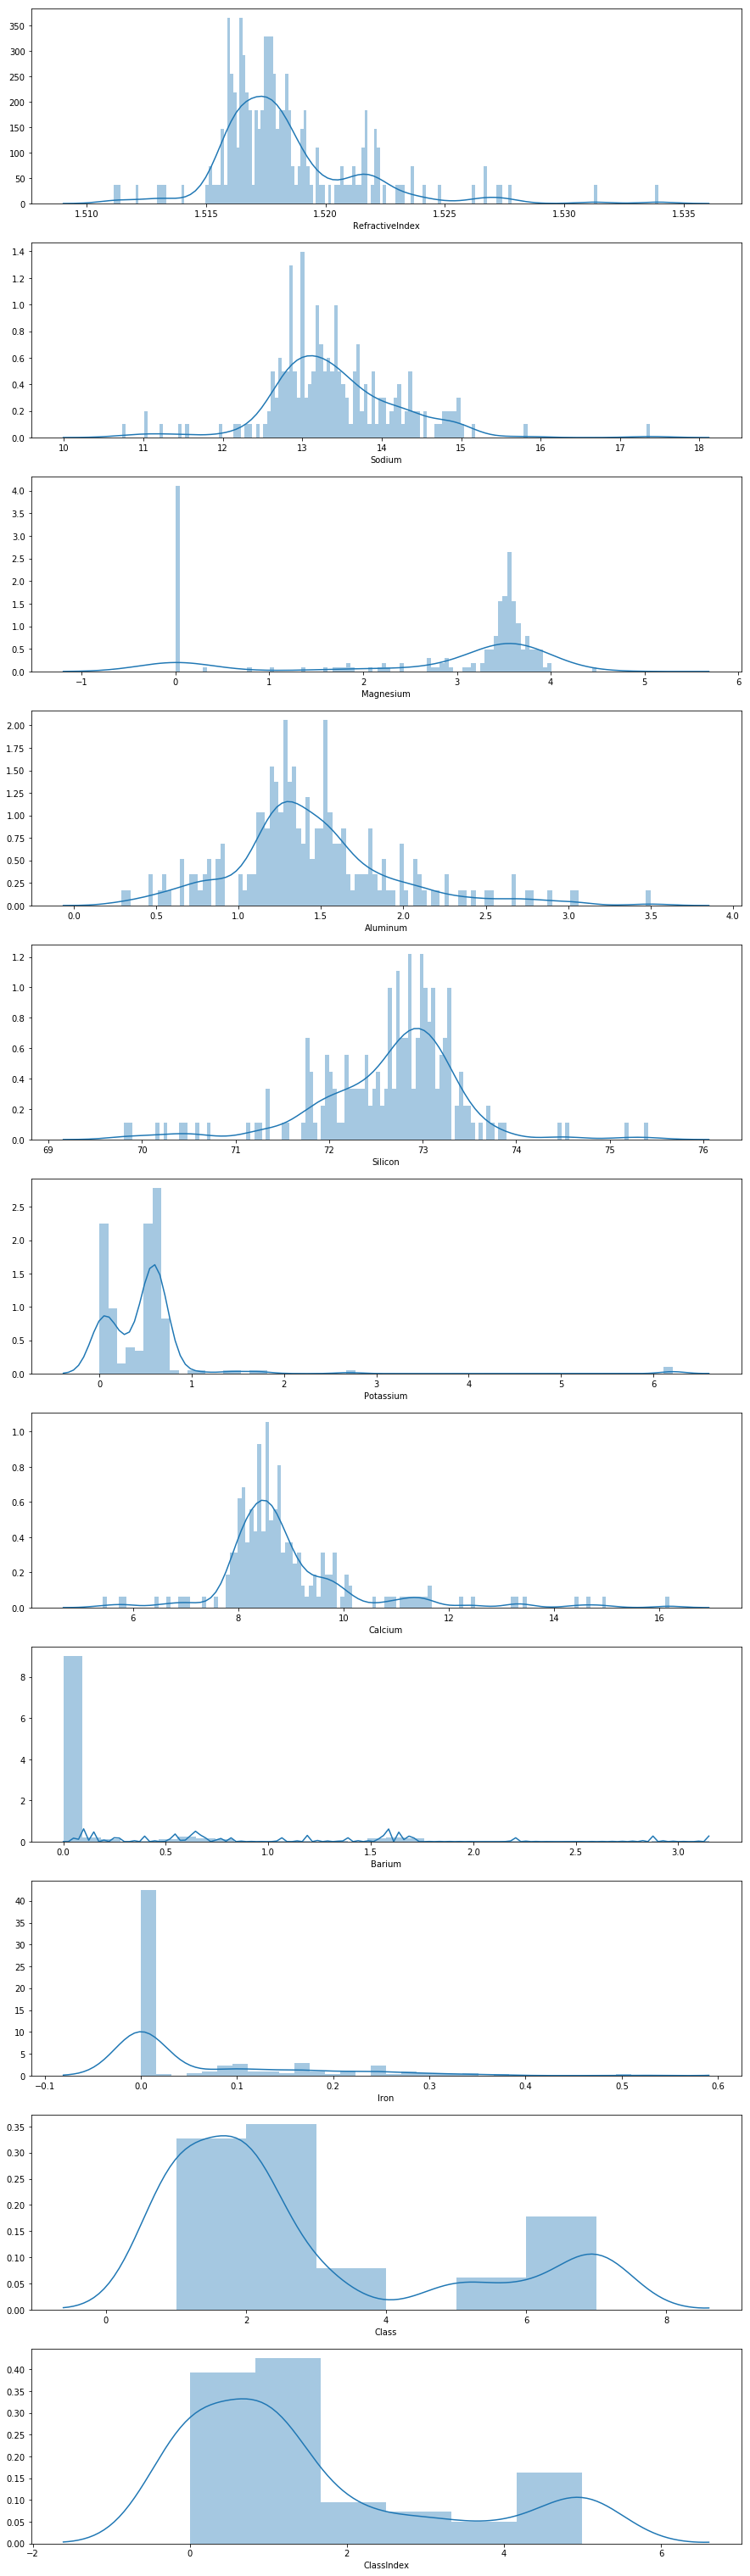

In [116]:
col = glass.columns
fig, ax = plt.subplots(len(col), 1, figsize=(15, len(col)*5))

for i in range(len(col)):
    sbn.distplot(glass[col[i]], bins = int(glass_stats[col[i]]['nunique']), ax=ax[i])
plt.show()

# Diabetes Insight

In [3]:
diabetes = load_diabetes()

print(diabetes.columns)
print(diabetes.dtypes)

Index(['index', 'Date', 'Time', 'Code', 'Value', 'namefile', 'DateTime'], dtype='object')
index                int64
Date                object
Time                object
Code                 int64
Value              float64
namefile            object
DateTime    datetime64[ns]
dtype: object


In [4]:
diabetes

,index,Date,Time,Code,Value,namefile,DateTime
0,0,04-21-1991,9:09,58,100.0,data-01,1991-04-21 09:09:00
1,1,04-21-1991,9:09,33,9.0,data-01,1991-04-21 09:09:00
2,2,04-21-1991,9:09,34,13.0,data-01,1991-04-21 09:09:00
3,3,04-21-1991,17:08,62,119.0,data-01,1991-04-21 17:08:00
4,4,04-21-1991,17:08,33,7.0,data-01,1991-04-21 17:08:00
5,5,04-21-1991,22:51,48,123.0,data-01,1991-04-21 22:51:00
6,6,04-22-1991,7:35,58,216.0,data-01,1991-04-22 07:35:00
7,7,04-22-1991,7:35,33,10.0,data-01,1991-04-22 07:35:00
8,8,04-22-1991,7:35,34,13.0,data-01,1991-04-22 07:35:00
9,9,04-22-1991,13:40,33,2.0,data-01,1991-04-22 13:40:00


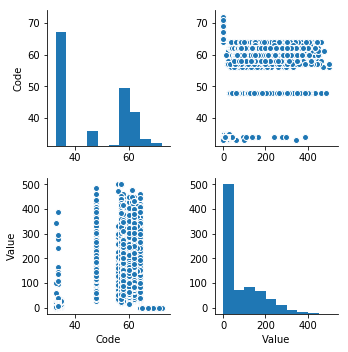

In [6]:
sbn.pairplot(diabetes[['Date', 'Time', 'Code', 'Value', 'DateTime']])#, hue='Class')

## Diabetes Stats:

In [5]:
diabetes_stats = diabetes.describe(include=[np.int64, np.float64, np.datetime64])
diabetes_stats = diabetes_stats.append(diabetes.nunique().rename('nunique').astype(int))
diabetes_stats

,index,Code,Value,DateTime,Date,Time,namefile
count,29242.000000,29242.000000,29242.000000,29242,NaN,NaN,NaN
unique,NaN,NaN,NaN,14739,NaN,NaN,NaN
top,NaN,NaN,NaN,1989-04-07 08:00:00,NaN,NaN,NaN
freq,NaN,NaN,NaN,15,NaN,NaN,NaN
first,NaN,NaN,NaN,1988-03-27 08:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,1991-09-23 21:10:00,NaN,NaN,NaN
mean,317.061521,46.495862,79.421979,NaN,NaN,NaN,NaN
std,286.642104,13.368426,93.523168,NaN,NaN,NaN,NaN
min,0.000000,33.000000,0.000000,NaN,NaN,NaN,NaN
25%,105.000000,33.000000,6.000000,NaN,NaN,NaN,NaN


## Nb Unique Values

In [9]:
sum(diabetes_stats.loc['nunique'])

19037.0

## Attributes Histograms & Distributions

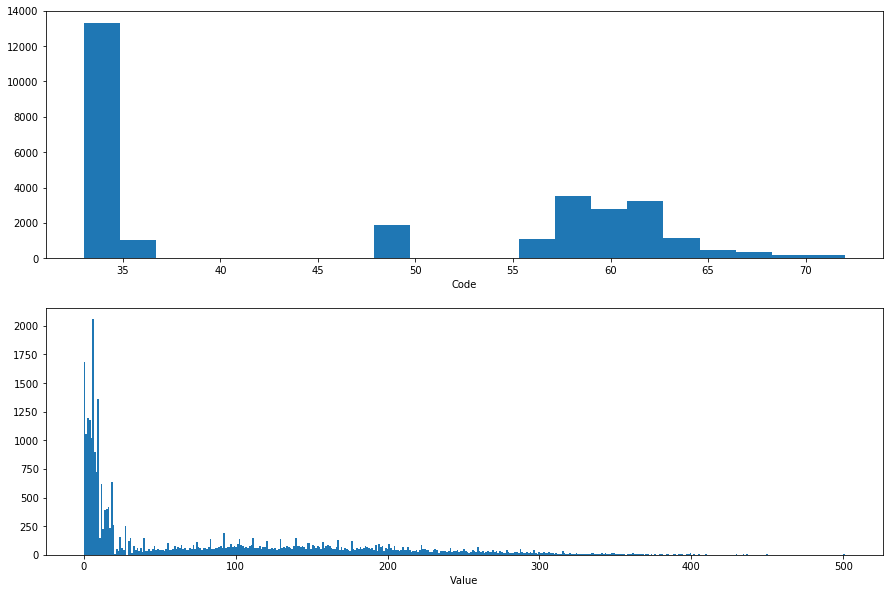

In [6]:
col = ['Code', 'Value']#, 'DateTime']
fig, ax = plt.subplots(len(col), 1, figsize=(15, len(col)*5))

for i in range(len(col)):
    ax[i].hist(diabetes[col[i]], bins = int(diabetes_stats[col[i]]['nunique']))
    ax[i].set_xlabel(col[i])
plt.show()

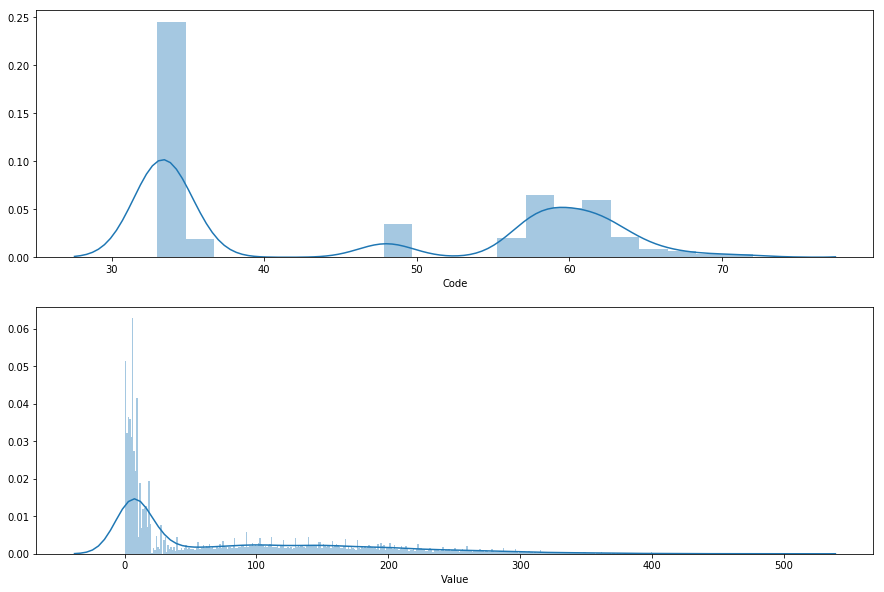

In [7]:
col = col = ['Code', 'Value']
fig, ax = plt.subplots(len(col), 1, figsize=(15, len(col)*5))

for i in range(len(col)):
    sbn.distplot(diabetes[col[i]], bins = int(diabetes_stats[col[i]]['nunique']), ax=ax[i])
plt.show()

# Pima Diabetes Insight

In [6]:
pima = load_pima_diabetes()
print(pima.columns)

Index(['NbPregnancies', 'PlasmaGlucoseConcentration', 'DiastolicBloodPressure',
       'TricepsSkinFoldThickness', 'TwoHourSerumInsulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Class', 'ClassIndex'],
      dtype='object')


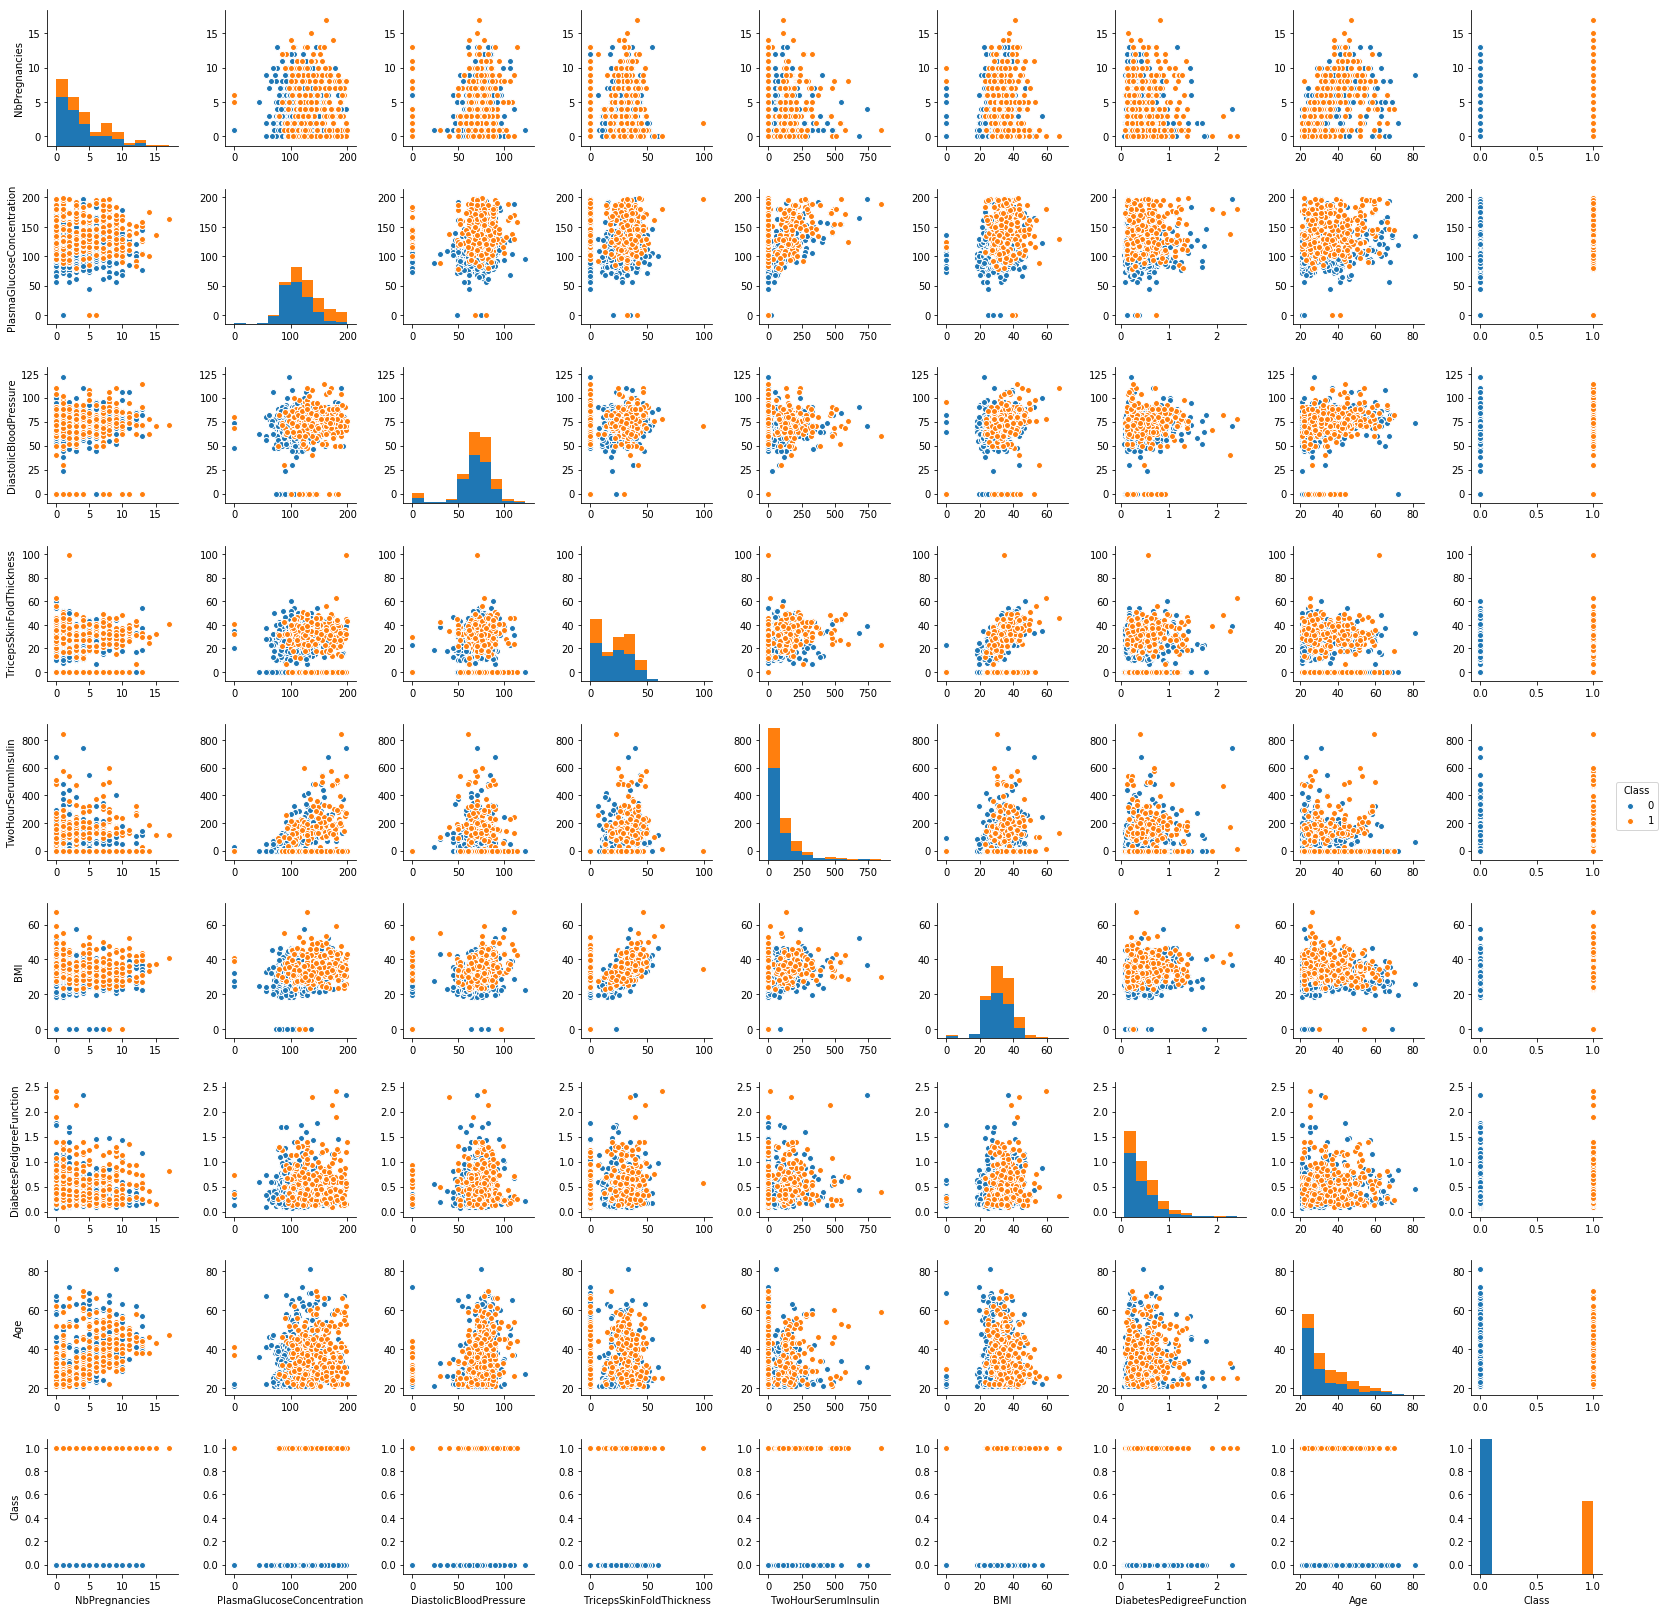

In [5]:
sbn.pairplot(pima[['NbPregnancies', 'PlasmaGlucoseConcentration', 'DiastolicBloodPressure',
                   'TricepsSkinFoldThickness', 'TwoHourSerumInsulin', 'BMI',
                   'DiabetesPedigreeFunction', 'Age', 'Class']], hue='Class')

## Pima Stats:

In [6]:
pima_stats = pima.describe()
pima_stats = pima_stats.append(pima.nunique().rename('nunique').astype(int))
pima_stats

,NbPregnancies,PlasmaGlucoseConcentration,DiastolicBloodPressure,TricepsSkinFoldThickness,TwoHourSerumInsulin,BMI,DiabetesPedigreeFunction,Age,Class,ClassIndex
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,0.651042
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000
nunique,17.000000,136.000000,47.000000,51.000000,186.000000,248.000000,517.000000,52.000000,2.000000,2.000000


## Nb Unique Values

In [8]:
sum(pima_stats.loc['nunique'])

1258.0

In [7]:
for v in set(pima.Class):
    print(v, len(pima[pima.Class==v]))

0 500
1 268


## Attributes Histograms & Distributions

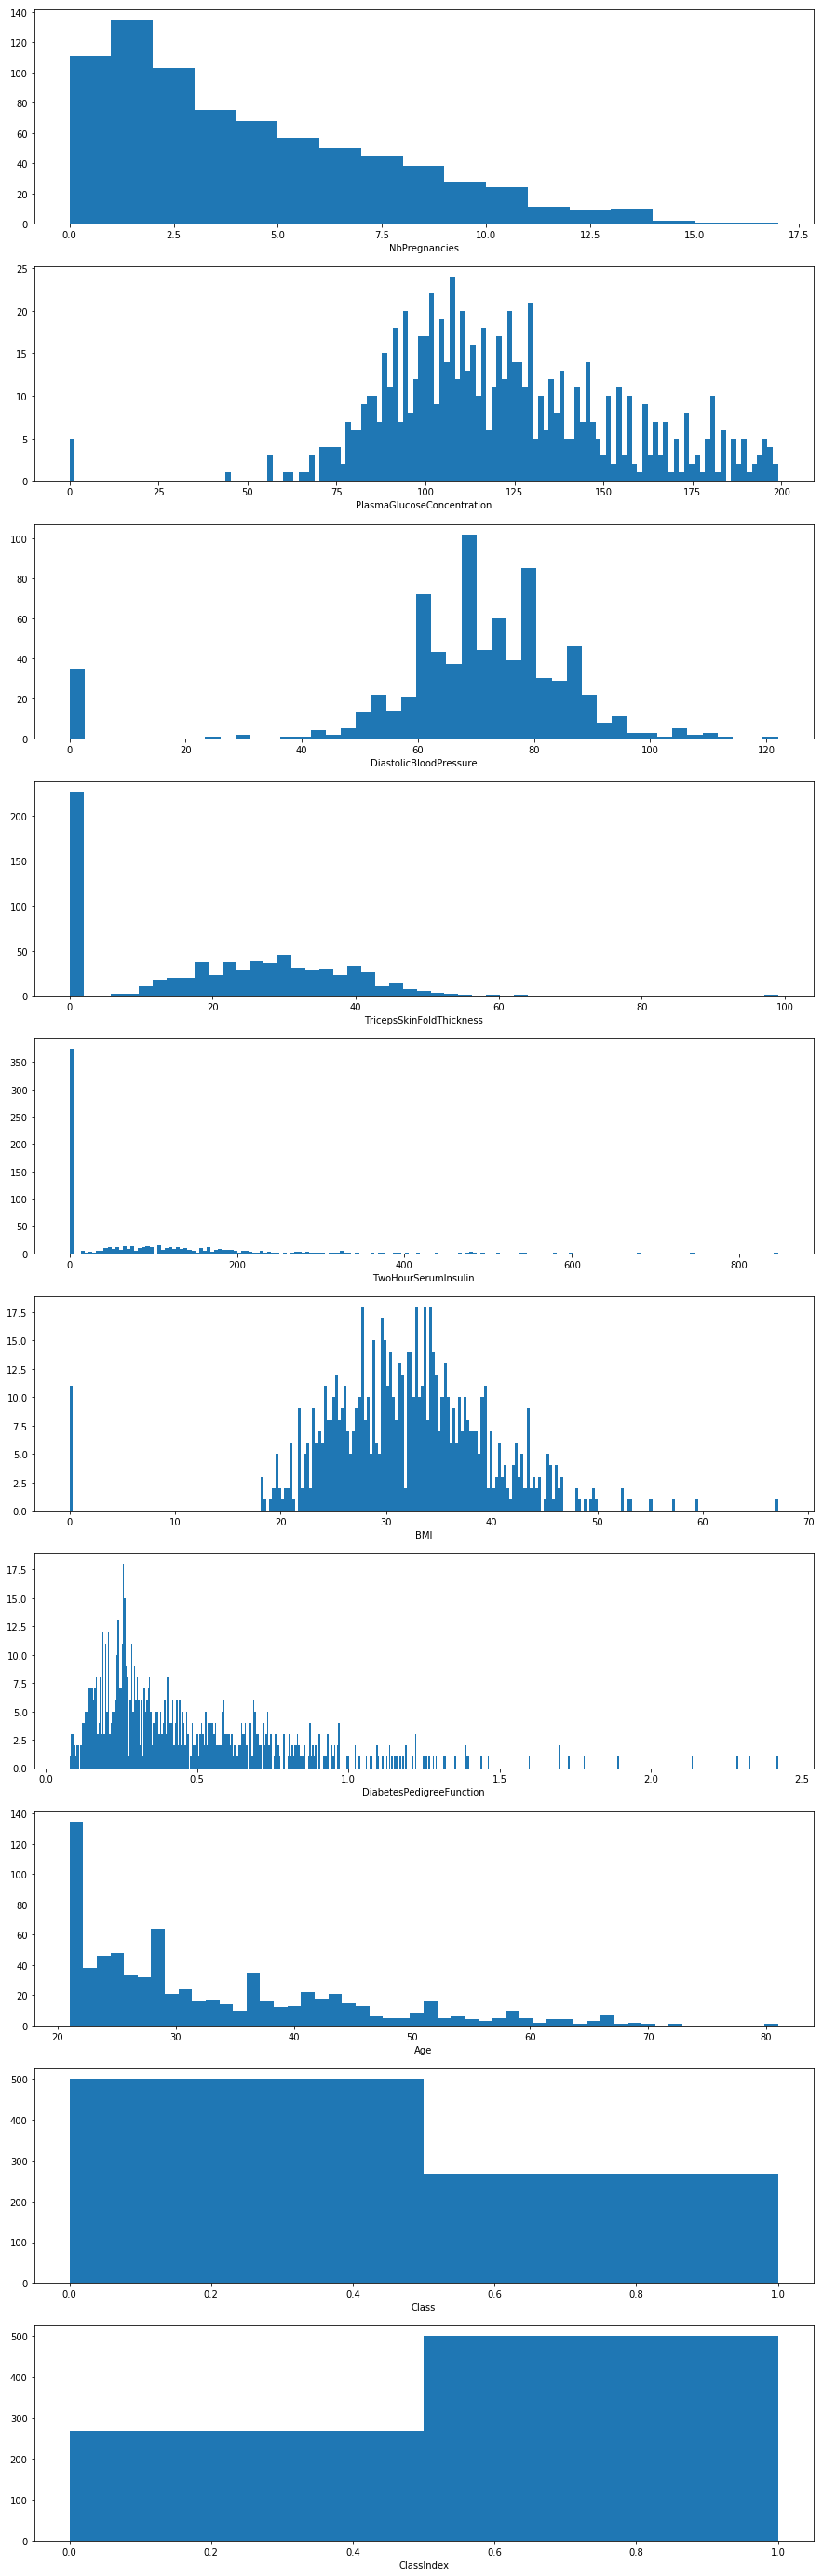

In [9]:
col = pima.columns
fig, ax = plt.subplots(len(col), 1, figsize=(15, len(col)*5))

for i in range(len(col)):
    ax[i].hist(pima[col[i]], bins = int(pima_stats[col[i]]['nunique']))
    ax[i].set_xlabel(col[i])
plt.show()

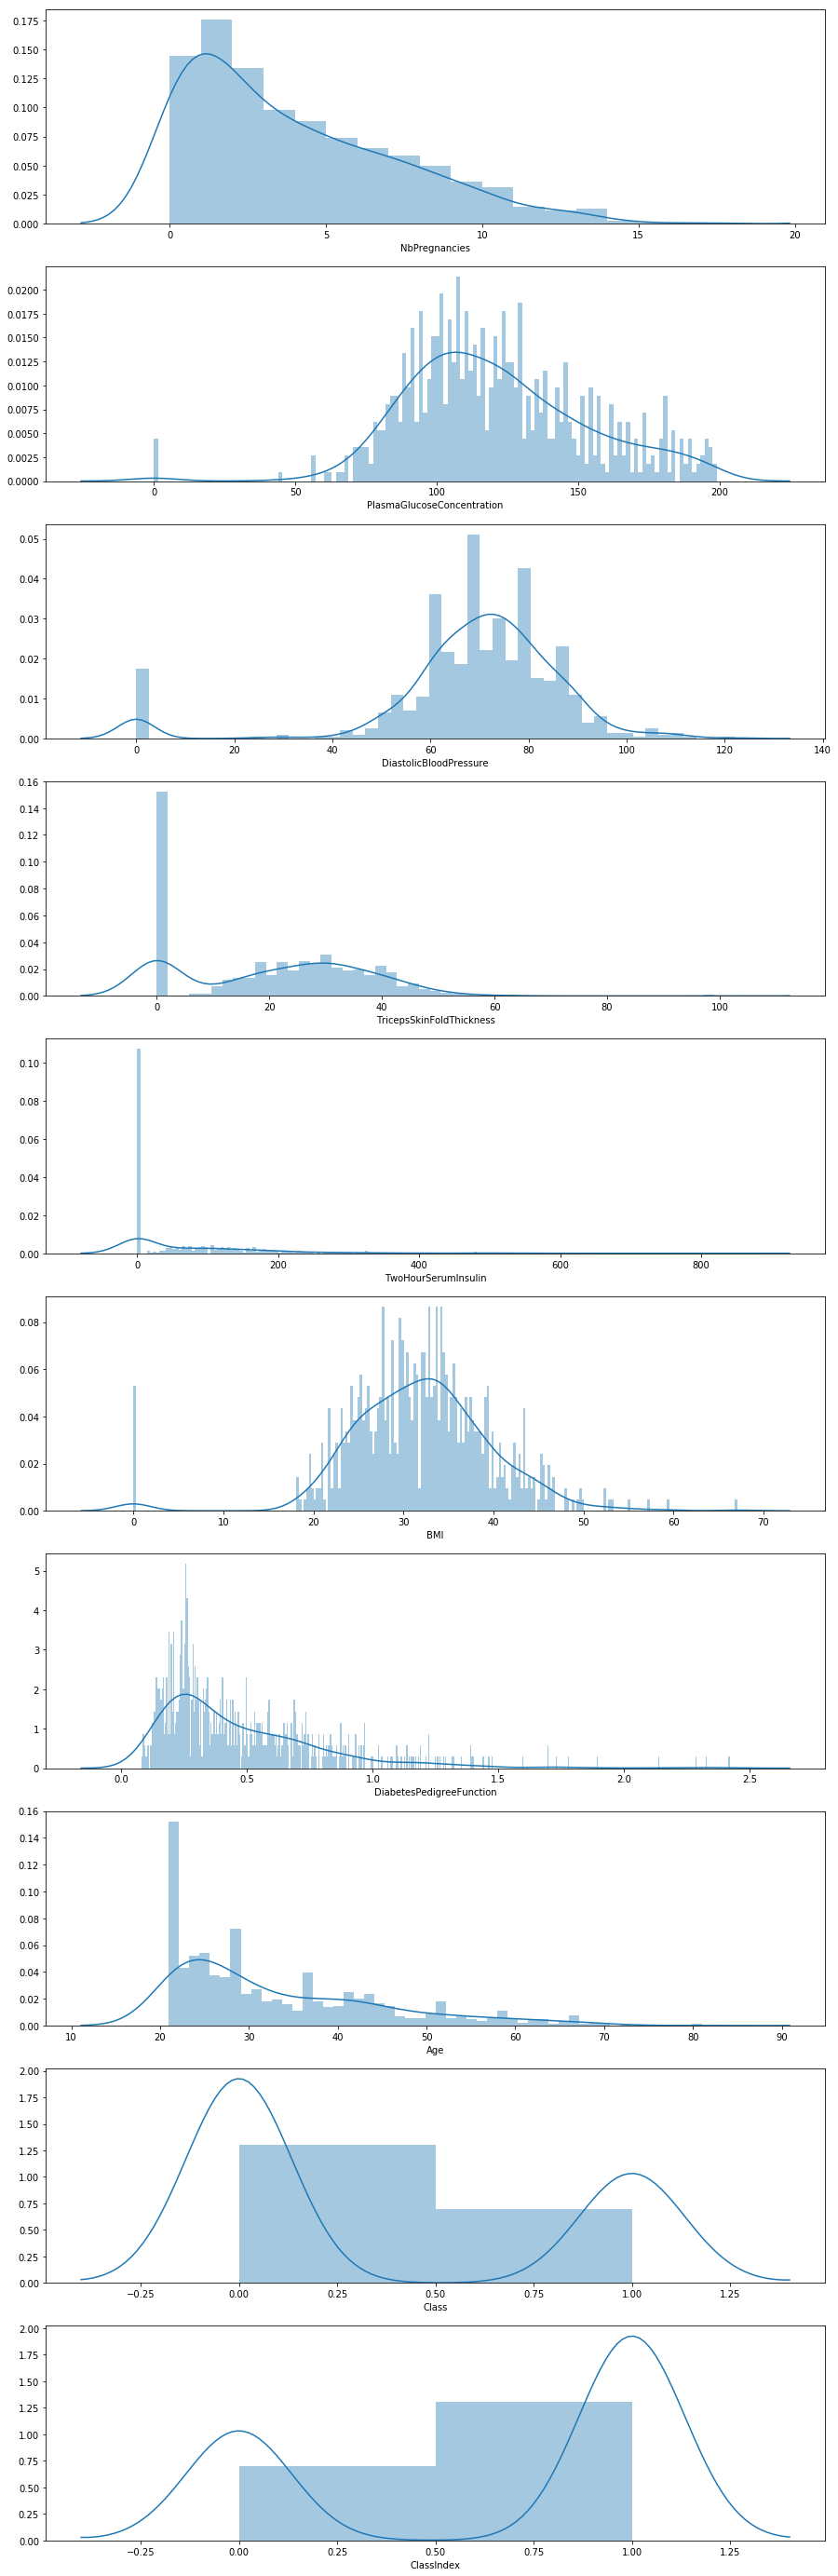

In [10]:
col = pima.columns
fig, ax = plt.subplots(len(col), 1, figsize=(15, len(col)*5))

for i in range(len(col)):
    sbn.distplot(pima[col[i]], bins = int(pima_stats[col[i]]['nunique']), ax=ax[i])
plt.show()

In [11]:
from sklearn.manifold import TSNE

In [14]:
tsne=TSNE(3)
g = tsne.fit_transform(pima[['NbPregnancies', 'PlasmaGlucoseConcentration', 'DiastolicBloodPressure',
                           'TricepsSkinFoldThickness', 'TwoHourSerumInsulin', 'BMI',
                           'DiabetesPedigreeFunction', 'Age']].values)

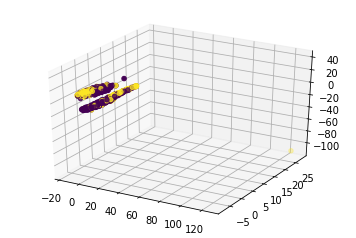

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(g[:,0], g[:,1], g[:,2],c=pima.Class.values)